In [1]:
import pandas as pd
from google.colab import files
import io
import pandas as pd
from google.colab import files
import io
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Understanding the Domain

In [2]:
uploaded = files.upload()
upi_data = pd.read_csv(io.BytesIO(uploaded["upi.csv"]))
upi_data.head()

Saving upi.csv to upi.csv


,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
0,Airtel Payments Bank Apps,9.04,2248.49,15.12,5732.09,12,2021
1,Airtel Payments Bank Apps,8.41,1923.95,15.90,5554.63,11,2021
2,Airtel Payments Bank Apps,7.60,1491.34,14.31,4746.79,10,2021
3,Airtel Payments Bank Apps,6.91,1520.92,11.52,3759.12,9,2021
4,Airtel Payments Bank Apps,6.14,1396.65,9.31,2941.88,8,2021


# Data Selection

In [23]:
year_unique = upi_data['Year'].unique()
unique_banks_apps = upi_data['UPI Banks'].nunique()

year_unique, unique_banks_apps

(array([2021]), 69)

# Data Preprocessing

In [24]:
missing_values = upi_data.isnull().sum()
missing_values

UPI Banks                   0
Volume (Mn) By Costumers    0
Value (Cr) by Costumers     0
Volume (Mn)                 0
Value (Cr)                  0
Month                       0
Year                        0
Volume Difference (Mn)      0
dtype: int64

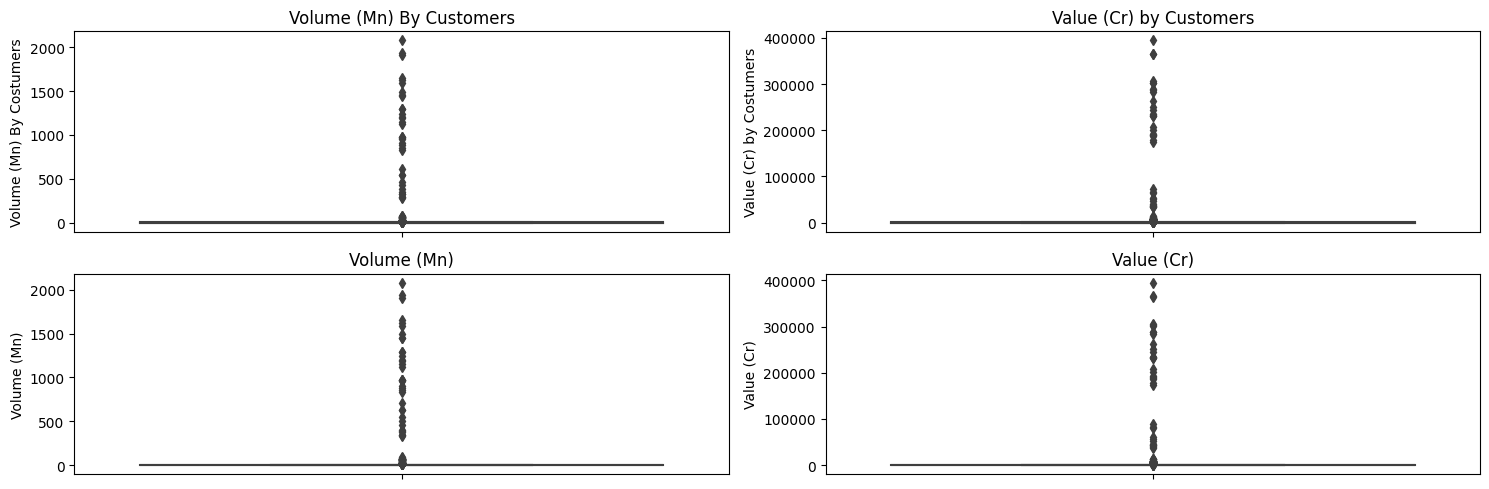

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(15, 5))

sns.boxplot(y=upi_data['Volume (Mn) By Costumers'], ax=ax[0, 0])
ax[0, 0].set_title('Volume (Mn) By Customers')

sns.boxplot(y=upi_data['Value (Cr) by Costumers'], ax=ax[0, 1])
ax[0, 1].set_title('Value (Cr) by Customers')

sns.boxplot(y=upi_data['Volume (Mn)'], ax=ax[1, 0])
ax[1, 0].set_title('Volume (Mn)')

sns.boxplot(y=upi_data['Value (Cr)'], ax=ax[1, 1])
ax[1, 1].set_title('Value (Cr)')

plt.tight_layout()
plt.show()

# Data Transformation

In [26]:
upi_data['Volume Difference (Mn)'] = upi_data['Volume (Mn)'] - upi_data['Volume (Mn) By Costumers']
upi_data.head()

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year,Volume Difference (Mn)
0,Airtel Payments Bank Apps,9.04,2248.49,15.12,5732.09,12,2021,6.08
1,Airtel Payments Bank Apps,8.41,1923.95,15.90,5554.63,11,2021,7.49
2,Airtel Payments Bank Apps,7.60,1491.34,14.31,4746.79,10,2021,6.71
3,Airtel Payments Bank Apps,6.91,1520.92,11.52,3759.12,9,2021,4.61
4,Airtel Payments Bank Apps,6.14,1396.65,9.31,2941.88,8,2021,3.17


# Overall Trends

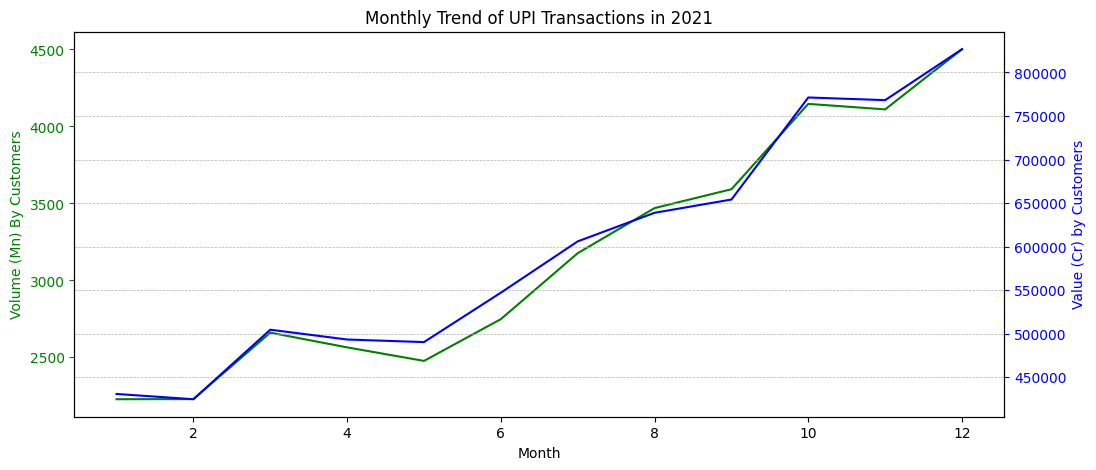

In [27]:
monthly_data = upi_data.groupby('Month').agg({
    'Volume (Mn) By Costumers': 'sum',
    'Value (Cr) by Costumers': 'sum',
    'Volume (Mn)': 'sum',
    'Value (Cr)': 'sum'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 5))

ax2 = ax1.twinx()

ax1.plot(monthly_data['Month'], monthly_data['Volume (Mn) By Costumers'], 'g-')
ax1.set_xlabel('Month')
ax1.set_ylabel('Volume (Mn) By Customers', color='g')
ax1.tick_params('y', colors='g')

ax2.plot(monthly_data['Month'], monthly_data['Value (Cr) by Costumers'], 'b-')
ax2.set_ylabel('Value (Cr) by Customers', color='b')
ax2.tick_params('y', colors='b')

plt.title('Monthly Trend of UPI Transactions in 2021')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Top Banks/UPI Apps

In [28]:
banks_data = upi_data.groupby('UPI Banks').agg({
    'Volume (Mn) By Costumers': 'sum',
    'Value (Cr) by Costumers': 'sum'
}).reset_index()

top_banks_volume = banks_data.sort_values(by='Volume (Mn) By Costumers', ascending=False).head(5)
top_banks_value = banks_data.sort_values(by='Value (Cr) by Costumers', ascending=False).head(5)

top_banks_volume, top_banks_value

(                  UPI Banks  Volume (Mn) By Costumers  Value (Cr) by Costumers
 51                  PhonePe                  17470.81               3365727.16
 26               Google Pay                  13541.88               2737496.81
 50  Paytm Payments Bank App                   4827.38                573899.84
 3                Amazon Pay                    704.15                 60962.34
 67            Yes Bank Apps                    292.50                 61298.95,
                   UPI Banks  Volume (Mn) By Costumers  Value (Cr) by Costumers
 51                  PhonePe                  17470.81               3365727.16
 26               Google Pay                  13541.88               2737496.81
 50  Paytm Payments Bank App                   4827.38                573899.84
 16                     Cred                     80.96                 97013.60
 6                      BHIM                    289.43                 91106.89)

# Distribution of Transactions

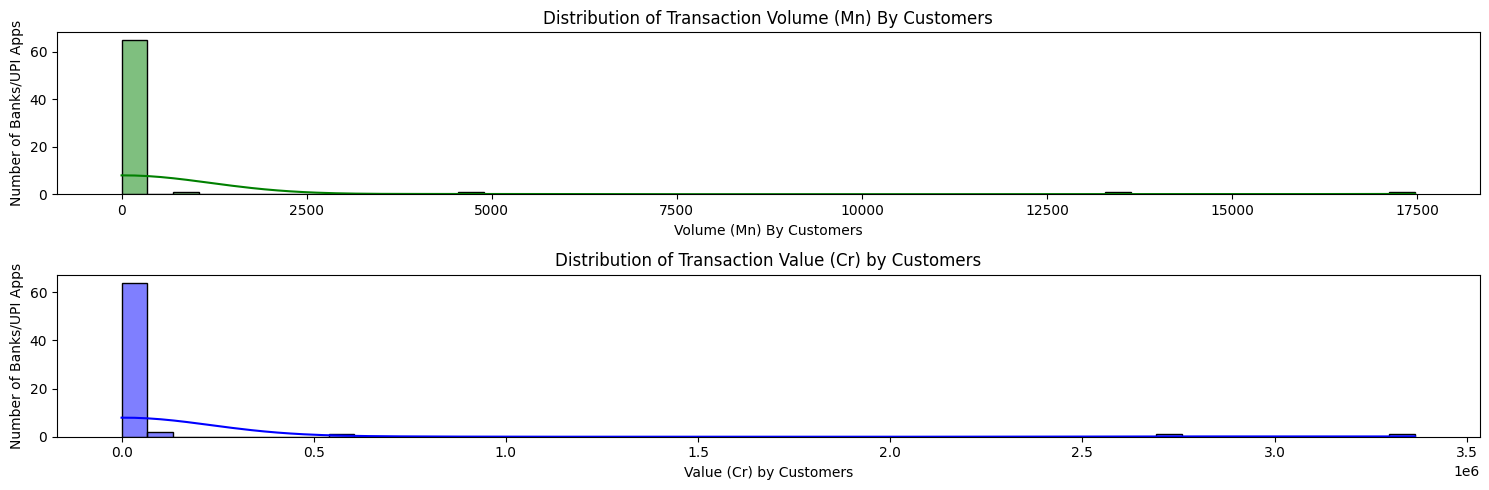

In [29]:
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

sns.histplot(banks_data['Volume (Mn) By Costumers'], bins=50, kde=True, ax=ax[0], color='g')
ax[0].set_title('Distribution of Transaction Volume (Mn) By Customers')
ax[0].set_xlabel('Volume (Mn) By Customers')
ax[0].set_ylabel('Number of Banks/UPI Apps')

sns.histplot(banks_data['Value (Cr) by Costumers'], bins=50, kde=True, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Value (Cr) by Customers')
ax[1].set_xlabel('Value (Cr) by Customers')
ax[1].set_ylabel('Number of Banks/UPI Apps')

plt.tight_layout()
plt.show()

# Clustering

In [30]:
import numpy as np
features = ['Volume (Mn) By Costumers', 'Value (Cr) by Costumers']
X = banks_data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
banks_data['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_summary = banks_data.groupby('Cluster').mean().reset_index()

cluster_summary['Number of Banks/UPI Apps'] = banks_data['Cluster'].value_counts().values

cluster_summary

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-30-b266de8d1505>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = banks_data.groupby('Cluster').mean().reset_index()


,Cluster,Volume (Mn) By Costumers,Value (Cr) by Costumers,Number of Banks/UPI Apps
0,0,31.308939,7.269541e+03,66
1,1,15506.345000,3.051612e+06,2
2,2,4827.380000,5.738998e+05,1
